Примечание: не о всех функциях numpy, нужных для решения задач, я могла вам рассказывать. Обращайтесь к документации! Практика поможет освоить numpy лучше, чем любая лекция (мне в свое время просто скинули эти задачи, не рассказав ничего про numpy). 

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [1]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) Предположим, вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Верхняя оценка - 10. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [35]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return round(np.sum(weights * marks))

In [36]:
marks = np.array(input('Введите оценки через пробел: ').split(), dtype='int_')
# marks = np.random.randint(11, size=4)
weights = np.array([0.3, 0.4, 0.2, 0.1])

print(f'Ваша итоговая оценка: {result_mark(weights, marks)}')

Введите оценки через пробел: 8 6 7 6
Ваша итоговая оценка: 7


In [33]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [34]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [42]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array

In [45]:
array = np.array(input('Задайте массив из целых чисел через пробел: ').split(), dtype='int_')
number = int(input('Введите число для замены значения: '))

print(f'Измененный массив: {change_array(array, number)}')

Задайте массив из целых чисел через пробел: 1 2 3 4 5 6 7
Введите число для замены значения: 0
Измененный массив: [0 2 3 0 5 6 0]


In [46]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [47]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

сначала хотела использовать метод .isclose(), но функция не проходила вторую проверку (не до конца поняла почему но, возможно, это связано с особенностями самого метода и значениями массива (выдавал True для тех элементов, которые формально не проходили по precision))

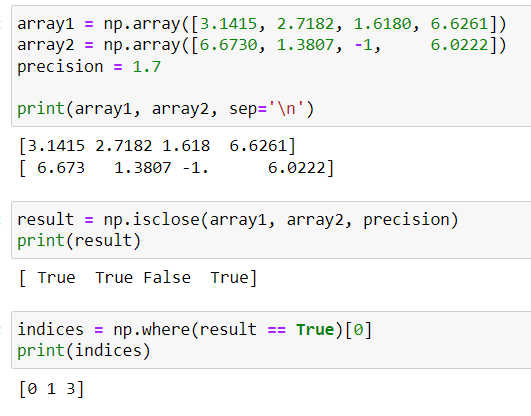

In [46]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    result = np.abs(array1 - array2)
    return np.where(result <= precision)[0]

In [47]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [48]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [18]:
def block_matrix(block: np.array) -> np.array:
    block = np.concatenate([block, block]) # объединяем массивы
    return np.hstack([block, block]) # соединяем объединенный массив горизонтально (получается 4 блока в итоге)

In [19]:
block = np.array([[2, 4, 5, 0], [1, 4, 2, 1], [3, 3, 5, 1], [0, -24, 7, 5]])
print(f'Блочная матрица:\n{block_matrix(block)}')

Блочная матрица:
[[  2   4   5   0   2   4   5   0]
 [  1   4   2   1   1   4   2   1]
 [  3   3   5   1   3   3   5   1]
 [  0 -24   7   5   0 -24   7   5]
 [  2   4   5   0   2   4   5   0]
 [  1   4   2   1   1   4   2   1]
 [  3   3   5   1   3   3   5   1]
 [  0 -24   7   5   0 -24   7   5]]


In [20]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [49]:
def diag_prod(matrix: np.array) -> int:
    diag = np.diagonal(matrix) # достаем диагональ матрицы
    return np.prod(diag[diag != 0]) # перемножаем те элементы, которые != 0

In [50]:
matrix = np.random.randint(50, size=(5, 5))
print(f'Матрица:\n{matrix}\nПроизведение ненулевых диагональных элементов: {diag_prod(matrix)}')

Матрица:
[[20  9 36 13 12]
 [ 8 19 25 32  5]
 [39 44 15 38 39]
 [22 39 48 22 20]
 [ 5 49 48 35 41]]
Произведение ненулевых диагональных элементов: 5141400


In [51]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [52]:
def normalize(matrix: np.array) -> np.array:
    mean_values = np.mean(matrix, axis=0) # берем столбец
    std_values = np.std(matrix, axis=0)
    std_values[std_values == 0] = 1 # стандартное отклонение может получится 0, если элементы в столбце матрицы будут одинаковыми
    return (matrix - mean_values) / std_values

In [53]:
matrix = np.array([[1, 4, 4200], [1, 10, 5000], [1, 2, 1000]])
print(f'Нормализованная матрица:\n{normalize(matrix)}')

Нормализованная матрица:
[[ 0.         -0.39223227  0.46291005]
 [ 0.          1.37281295  0.9258201 ]
 [ 0.         -0.98058068 -1.38873015]]


In [54]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [55]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### Задание 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [37]:
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(coefs, k=0)

In [38]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [39]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### Задание 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [9]:
def make_symmetric(matrix: np.array) -> np.array:
    transposed = np.transpose(matrix)
    return np.tril(transposed, -1) + matrix # к транспонированной матрице прибавляем исходную матрицу, заполняя нули

In [10]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [11]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [12]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    matrix = np.arange(a, b + 1) # создаем массив из элементов от a до b включительно
    return np.tile(matrix, (m, 1)) # создаем матрицу и копируем строку m раз

In [13]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [14]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [15]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    dot_product = np.dot(vec1, vec2) # скалярное произведение
    vec1_norm, vec2_norm = np.linalg.norm(vec1), np.linalg.norm(vec2) # вычисляем норму векторов
    return dot_product / (vec1_norm * vec2_norm) # косинусная близость — отношение скалярного произведения к произведению норм

In [16]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [17]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)